In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
data=pd.read_csv('tata motors train data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,03-01-2000,207.4,217.25,207.4,216.75,676126
1,04-01-2000,217.0,219.00,206.0,208.20,679215
2,05-01-2000,194.0,217.80,194.0,213.25,1120951
3,06-01-2000,215.0,229.90,215.0,222.10,1968998
4,07-01-2000,224.0,239.90,223.1,239.90,2199431


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3714 entries, 0 to 3713
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3714 non-null   object 
 1   Open    3714 non-null   float64
 2   High    3714 non-null   float64
 3   Low     3714 non-null   float64
 4   Close   3714 non-null   float64
 5   Volume  3714 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 174.2+ KB


In [6]:
data.shape

(3714, 6)

In [7]:
data=data.dropna()
trainData = data.iloc[:,4:5].values

In [8]:
sc=MinMaxScaler (feature_range=(0,1))
trainData = sc.fit_transform(trainData)

In [9]:
trainData.shape

(3714, 1)

In [10]:
X_train =[]
y_train= []
for i in range (60,3714): #60 timestep // 1149 Length of the data
    X_train.append(trainData[i-60:i, 0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train), np.array(y_train)
X_train.shape

(3654, 60)

In [11]:
X_train = np.reshape (X_train, (X_train.shape[0],X_train.shape[1], 1)) #adding the batch_size axis
X_train.shape

(3654, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM (units=100, return_sequences = True, input_shape=(X_train.shape [1],1)))
model.add(Dropout(0.2))

model.add(LSTM (units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM (units=100, return_sequences = True))
model.add(Dropout (0.2))

model.add(LSTM (units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile (optimizer='adam', loss="mean_squared_error")

In [12]:
hist=model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
115/115 - 20s - loss: 0.0082 - 20s/epoch - 177ms/step
Epoch 2/20
115/115 - 15s - loss: 0.0027 - 15s/epoch - 134ms/step
Epoch 3/20
115/115 - 18s - loss: 0.0023 - 18s/epoch - 154ms/step
Epoch 4/20
115/115 - 16s - loss: 0.0019 - 16s/epoch - 136ms/step
Epoch 5/20
115/115 - 16s - loss: 0.0019 - 16s/epoch - 143ms/step
Epoch 6/20
115/115 - 16s - loss: 0.0016 - 16s/epoch - 139ms/step
Epoch 7/20
115/115 - 17s - loss: 0.0017 - 17s/epoch - 144ms/step
Epoch 8/20
115/115 - 17s - loss: 0.0014 - 17s/epoch - 148ms/step
Epoch 9/20
115/115 - 17s - loss: 0.0013 - 17s/epoch - 145ms/step
Epoch 10/20
115/115 - 18s - loss: 0.0014 - 18s/epoch - 155ms/step
Epoch 11/20
115/115 - 17s - loss: 0.0012 - 17s/epoch - 147ms/step
Epoch 12/20
115/115 - 18s - loss: 0.0013 - 18s/epoch - 154ms/step
Epoch 13/20
115/115 - 19s - loss: 0.0011 - 19s/epoch - 167ms/step
Epoch 14/20
115/115 - 19s - loss: 0.0010 - 19s/epoch - 167ms/step
Epoch 15/20
115/115 - 19s - loss: 0.0011 - 19s/epoch - 166ms/step
Epoch 16/20
115/115

In [15]:
plt.plot(hist.history['loss'])
plt.title('training model loss')
plt.rcParams["figure.figsize"]=(8,5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [18]:
hist=model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=2)

Epoch 1/50
115/115 - 18s - loss: 6.1751e-04 - 18s/epoch - 160ms/step
Epoch 2/50
115/115 - 18s - loss: 5.2550e-04 - 18s/epoch - 152ms/step
Epoch 3/50
115/115 - 18s - loss: 5.2199e-04 - 18s/epoch - 153ms/step
Epoch 4/50
115/115 - 18s - loss: 5.6792e-04 - 18s/epoch - 155ms/step
Epoch 5/50
115/115 - 21s - loss: 5.0938e-04 - 21s/epoch - 182ms/step
Epoch 6/50
115/115 - 21s - loss: 5.5732e-04 - 21s/epoch - 187ms/step
Epoch 7/50
115/115 - 20s - loss: 6.5123e-04 - 20s/epoch - 176ms/step
Epoch 8/50
115/115 - 19s - loss: 4.9137e-04 - 19s/epoch - 169ms/step
Epoch 9/50
115/115 - 19s - loss: 5.2547e-04 - 19s/epoch - 163ms/step
Epoch 10/50
115/115 - 19s - loss: 5.2000e-04 - 19s/epoch - 162ms/step
Epoch 11/50
115/115 - 19s - loss: 5.0640e-04 - 19s/epoch - 168ms/step
Epoch 12/50
115/115 - 19s - loss: 5.0911e-04 - 19s/epoch - 161ms/step
Epoch 13/50
115/115 - 19s - loss: 5.4142e-04 - 19s/epoch - 164ms/step
Epoch 14/50
115/115 - 19s - loss: 4.9941e-04 - 19s/epoch - 168ms/step
Epoch 15/50
115/115 - 20s - l

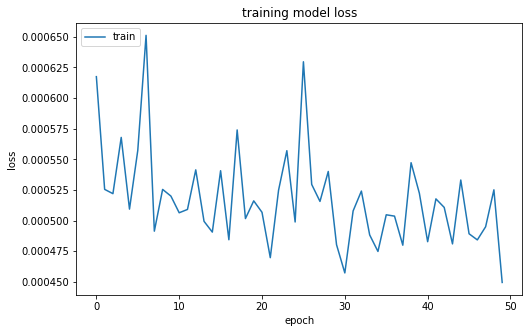

In [19]:
plt.plot(hist.history['loss'])
plt.title('training model loss')
plt.rcParams["figure.figsize"]=(8,5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [22]:
hist=model.fit(X_train,y_train,epochs=50,callbacks=EarlyStopping(monitor='loss'))

Epoch 1/50
115/115 [==============================] - 17s 149ms/step - loss: 5.1663e-04
Epoch 2/50
115/115 [==============================] - 17s 151ms/step - loss: 4.5847e-04


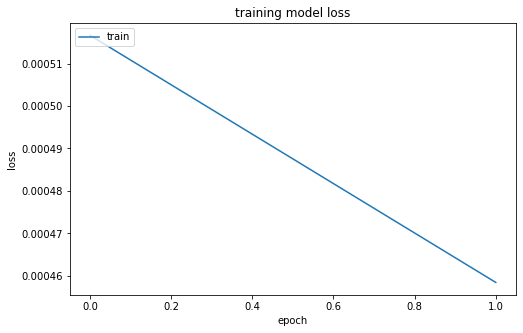

In [23]:
plt.plot(hist.history['loss'])
plt.title('training model loss')
plt.rcParams["figure.figsize"]=(8,5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()